In [4]:
    
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split  

In [5]:
import json

In [7]:
sen=loadDataset("SensitiveDataset.json")
nonsen=loadDataset("NonSensitiveDatasetnew.json")

NameError: name 'loadDataset' is not defined

In [ ]:
import pandas as pd
sen=pd.DataFrame(data=sen,columns=['sentences','labels'])
nonsen=pd.DataFrame(data=nonsen,columns=['sentences','labels'])
df= pd.concat([sen, nonsen], axis=0)
df=df.sample(frac=1).reset_index(drop=True)
df_sen=df[df['labels']==1]
df_non=df[df['labels']==0]
df_non_downsampled = df_non.sample(15000)
df_sen_downsampled=df_sen.sample(10000)
df_balanced = pd.concat([df_non_downsampled, df_sen_downsampled])

# Splitting into features (X) and labels (y)
X = df_balanced['sentences'].values
y = df_balanced['labels'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Tokenizing the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
#tokenizer.fit_on_texts(X_test)
word_dict = tokenizer.index_word
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Padding the data
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen=20, padding='post')
X_test = pad_sequences(X_test, maxlen=20, padding='post')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
#X_train = vectorizer.fit_transform(X_train)
#X_test = vectorizer.transform(X_test)

In [ ]:
# Create a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the classifier
classifier.fit(X_train, y_train)
# Predict the labels for the test data
y_pred = classifier.predict(X_test)
# Print the classification report
print(classification_report(y_test, y_pred))
print("Test Accuracy for Random Forest with n_estimators=100: ",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4502
           1       1.00      0.55      0.71      2998

    accuracy                           0.82      7500
   macro avg       0.89      0.78      0.79      7500
weighted avg       0.86      0.82      0.81      7500

Test Accuracy for Random Forest with n_estimators=100:  0.8218666666666666


In [ ]:
#implement 10-fold cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, y_train, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [1.         1.         1.         0.99885714 1.         1.
 0.99885714 1.         1.         1.        ]
Average cross-validation score: 1.00


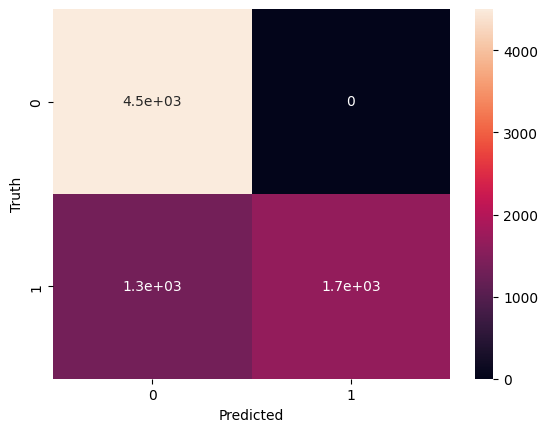

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True)
#labels
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree classifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3)
# Train the classifier
classifier.fit(X_train, y_train)
# Predict the labels for the test data
y_pred = classifier.predict(X_test)
# Print the classification report
print(classification_report(y_test, y_pred))
print("Decision Tree Accuracy: ",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88      4502
           1       0.98      0.62      0.76      2998

    accuracy                           0.84      7500
   macro avg       0.89      0.81      0.82      7500
weighted avg       0.87      0.84      0.83      7500

Accuracy:  0.844


In [ ]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn import svm
#implement the SVM model
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#classification report
print(classification_report(y_test, y_pred))
#accuracy score
print('Linear',accuracy_score(y_test, y_pred))

#Try different kernels
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('RBF',accuracy_score(y_test, y_pred))

clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('Poly',accuracy_score(y_test, y_pred))

clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('Sigmoid',accuracy_score(y_test, y_pred))